In [25]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pycaret.datasets import get_data
from pycaret.classification import *

In [26]:
df = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [27]:
df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [28]:
# Split the data and use randomForest as the model
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42,stratify=df['Class'])

In [29]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# Test the model and print the matrix of confusion
from sklearn.metrics import confusion_matrix  
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[85,  4],
       [ 1, 47]], dtype=int64)

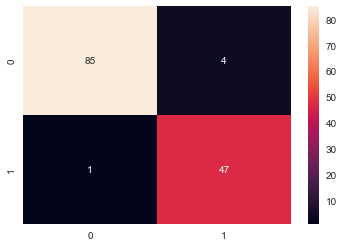

In [31]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

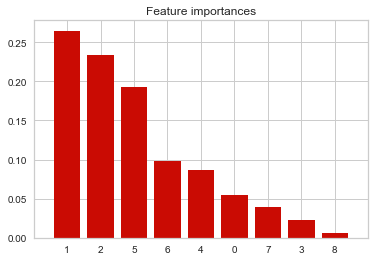

In [32]:
# Plot features importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
         color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [33]:
# Print the 10 most important features with the name of the column
columns_importance = []
importance_list = []
for f in range(0,4):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), df.columns[indices[f]])
    columns_importance.append(df.columns[indices[f]])
    importance_list.append(importances[indices[f]])
    
    

1. feature 1 (0.264771) age
2. feature 2 (0.234274) menopause
3. feature 5 (0.192888) node-caps
4. feature 6 (0.097884) deg-malig


In [34]:
np.sum(importance_list)

0.789816106736133

In [35]:
columns_importance.append('Class')

In [36]:
df = df[columns_importance]

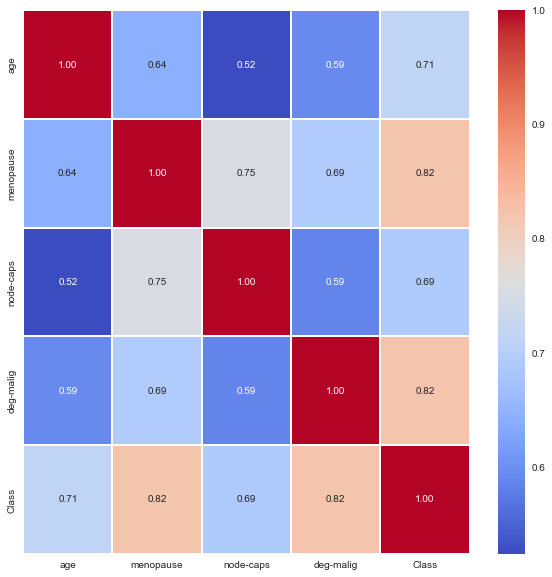

In [37]:
# Plot a correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)
plt.show()

In [38]:
df.describe()

,age,menopause,node-caps,deg-malig,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.234261,3.544656,0.349927
std,2.820761,3.065145,2.223085,3.643857,0.477296
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,0.000000
75%,6.000000,5.000000,4.000000,6.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,1.000000


In [39]:
df.columns

Index(['age', 'menopause', 'node-caps', 'deg-malig', 'Class'], dtype='object')

In [40]:
df.head()

,age,menopause,node-caps,deg-malig,Class
0,5,1,2,1,0
1,5,4,7,10,0
2,3,1,2,2,0
3,6,8,3,4,0
4,4,1,2,1,0


In [41]:
df.dtypes

age          int64
menopause    int64
node-caps    int64
deg-malig    int64
Class        int64
dtype: object

In [42]:
# Print accuraccy in test and train
print('Accuracy of RF classifier on training set: {:.2f}'
        .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
        .format(clf.score(X_test, y_test)))


Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.96


In [44]:
df.dtypes

age          int64
menopause    int64
node-caps    int64
deg-malig    int64
Class        int64
dtype: object

In [49]:
clf1 = setup(data = df,target='Class', session_id=123, silent=True, log_experiment=True, experiment_name='automl_demo_breast_1',fix_imbalance=True,data_split_stratify=True,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(683, 5)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [50]:
# model training
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9645,0.9884,0.9757,0.9307,0.9511,0.9233,0.9258,0.8010
ridge,Ridge Classifier,0.9581,0.0000,0.9456,0.9387,0.9402,0.9080,0.9102,0.0370
lda,Linear Discriminant Analysis,0.9560,0.9908,0.9397,0.9383,0.9368,0.9031,0.9056,0.0450
rf,Random Forest Classifier,0.9539,0.9914,0.9456,0.9302,0.9350,0.8994,0.9028,0.7790
et,Extra Trees Classifier,0.9539,0.9853,0.9511,0.9244,0.9353,0.8996,0.9025,0.7980
lr,Logistic Regression,0.9498,0.9931,0.9452,0.9191,0.9298,0.8908,0.8936,0.0850
nb,Naive Bayes,0.9498,0.9793,0.9099,0.9489,0.9264,0.8884,0.8916,0.0400
lightgbm,Light Gradient Boosting Machine,0.9498,0.9881,0.9335,0.9277,0.9278,0.8894,0.8926,3.0690
ada,Ada Boost Classifier,0.9414,0.9383,0.9029,0.9317,0.9146,0.8701,0.8731,0.1850
gbc,Gradient Boosting Classifier,0.9414,0.9867,0.9158,0.9238,0.9158,0.8710,0.8755,0.1780


In [51]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [52]:
best = compare_models(n_select = 5)
compare_model_results = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9645,0.9884,0.9757,0.9307,0.9511,0.9233,0.9258,0.1490
ridge,Ridge Classifier,0.9581,0.0000,0.9456,0.9387,0.9402,0.9080,0.9102,0.0410
lda,Linear Discriminant Analysis,0.9560,0.9908,0.9397,0.9383,0.9368,0.9031,0.9056,0.0450
rf,Random Forest Classifier,0.9539,0.9914,0.9456,0.9302,0.9350,0.8994,0.9028,0.9220
et,Extra Trees Classifier,0.9539,0.9853,0.9511,0.9244,0.9353,0.8996,0.9025,0.8910
lr,Logistic Regression,0.9498,0.9931,0.9452,0.9191,0.9298,0.8908,0.8936,0.0610
nb,Naive Bayes,0.9498,0.9793,0.9099,0.9489,0.9264,0.8884,0.8916,0.0470
lightgbm,Light Gradient Boosting Machine,0.9498,0.9881,0.9335,0.9277,0.9278,0.8894,0.8926,2.6410
ada,Ada Boost Classifier,0.9414,0.9383,0.9029,0.9317,0.9146,0.8701,0.8731,0.2200
gbc,Gradient Boosting Classifier,0.9414,0.9867,0.9158,0.9238,0.9158,0.8710,0.8755,0.2050


In [53]:
compare_model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9645,0.9884,0.9757,0.9307,0.9511,0.9233,0.9258,0.149
ridge,Ridge Classifier,0.9581,0.0000,0.9456,0.9387,0.9402,0.9080,0.9102,0.041
lda,Linear Discriminant Analysis,0.9560,0.9908,0.9397,0.9383,0.9368,0.9031,0.9056,0.045
rf,Random Forest Classifier,0.9539,0.9914,0.9456,0.9302,0.9350,0.8994,0.9028,0.922
et,Extra Trees Classifier,0.9539,0.9853,0.9511,0.9244,0.9353,0.8996,0.9025,0.891
lr,Logistic Regression,0.9498,0.9931,0.9452,0.9191,0.9298,0.8908,0.8936,0.061
nb,Naive Bayes,0.9498,0.9793,0.9099,0.9489,0.9264,0.8884,0.8916,0.047
lightgbm,Light Gradient Boosting Machine,0.9498,0.9881,0.9335,0.9277,0.9278,0.8894,0.8926,2.641
ada,Ada Boost Classifier,0.9414,0.9383,0.9029,0.9317,0.9146,0.8701,0.8731,0.220
gbc,Gradient Boosting Classifier,0.9414,0.9867,0.9158,0.9238,0.9158,0.8710,0.8755,0.205


In [54]:
create_app(best_model)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1f64a71b5b0>, 'http://127.0.0.1:7860/', None)